In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
import numpy as np

In [55]:
fractional_cover = pd.read_csv("datasets/fractional_cover.csv")
pca_features = pd.read_csv("datasets/1000_wavelength_10features_pca.csv")

In [56]:
fractional_cover["tree_type"] = fractional_cover["plot_ID"].apply(lambda x: ''.join([char for char in x.split("_")[1] if char.isalpha()]))
fractional_cover_long = pd.wide_to_long(
    fractional_cover,
    stubnames=['vasc', 'nonvasc', 'lichen', 'intactlitt', 'decomplitt'],  # List of prefixes
    i='plot_ID',
    j='q',
    sep='_',
    suffix='q[1-4]'
).reset_index()
fractional_cover_long = fractional_cover_long.sort_index()

Plotting for the hyperspectral frequencies below, analysis here.

In [57]:
# Code here

Features in fractional_cover grouped by tree type, bars with means and standard deviation/variance below:

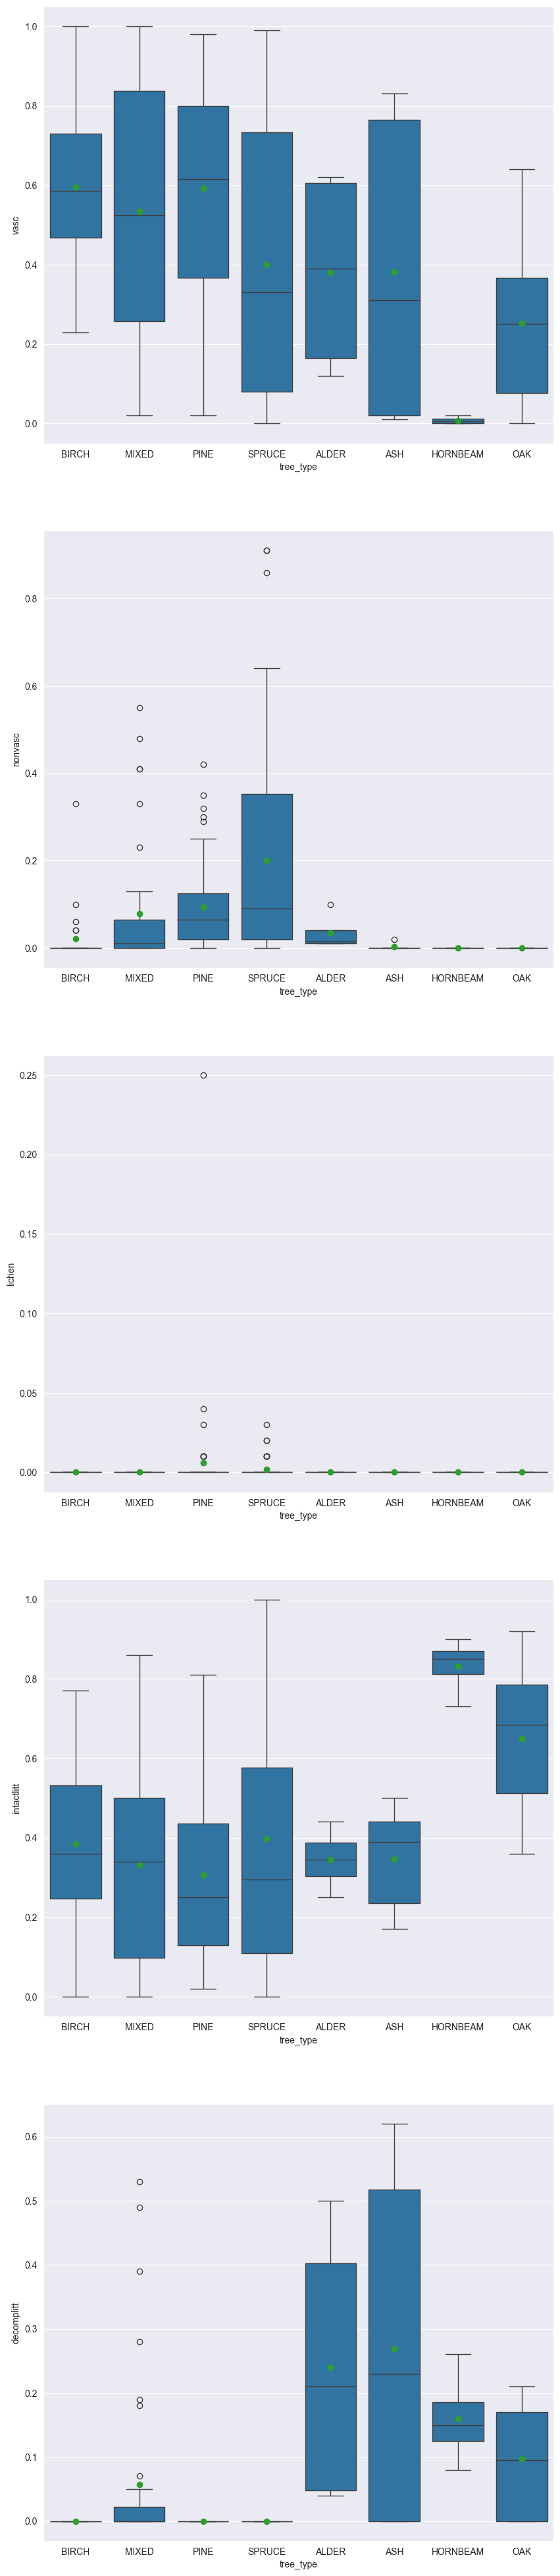

In [58]:
fig, axes = plt.subplots(5, figsize=(10, 50))
sns.boxplot(x="tree_type", y="vasc", data=fractional_cover_long, showmeans=True, meanprops={"marker":"o"}, ax=axes[0])
sns.boxplot(x="tree_type", y="nonvasc", data=fractional_cover_long, showmeans=True, meanprops={"marker":"o"}, ax=axes[1])
sns.boxplot(x="tree_type", y="lichen", data=fractional_cover_long, showmeans=True, meanprops={"marker":"o"}, ax=axes[2])
sns.boxplot(x="tree_type", y="intactlitt", data=fractional_cover_long, showmeans=True, meanprops={"marker":"o"}, ax=axes[3])
sns.boxplot(x="tree_type", y="decomplitt", data=fractional_cover_long, showmeans=True, meanprops={"marker":"o"}, ax=axes[4])
fig.savefig("plots/fractional_cover_by_tree_type.png", dpi=300)

Grouped by tree types vascular features for each location in the single line, multiple lines in single plot (select interesting plots)

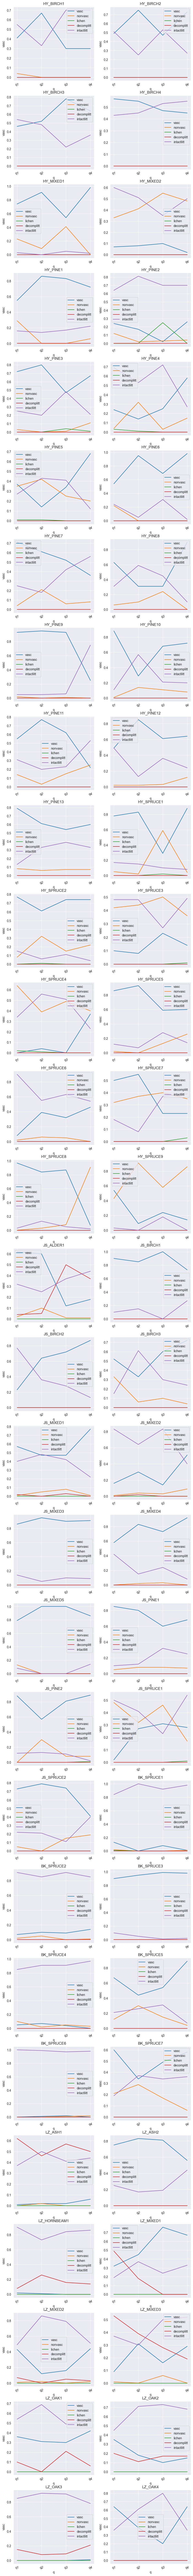

In [59]:
plots = fractional_cover["plot_ID"]

fig, axes = plt.subplots(len(plots) // 2, 2, figsize=(10, 145))

for i, plot in enumerate(plots):
    sns.lineplot(fractional_cover_long[fractional_cover_long["plot_ID"] == plot],
                 x="q", y="vasc", ax=axes[i // 2, i % 2], label="vasc")
    sns.lineplot(fractional_cover_long[fractional_cover_long["plot_ID"] == plot],
                 x="q", y="nonvasc", ax=axes[i // 2, i % 2], label="nonvasc")
    sns.lineplot(fractional_cover_long[fractional_cover_long["plot_ID"] == plot],
                 x="q", y="lichen", ax=axes[i // 2, i % 2], label="lichen")
    sns.lineplot(fractional_cover_long[fractional_cover_long["plot_ID"] == plot],
                 x="q", y="decomplitt", ax=axes[i // 2, i % 2], label="decomplitt")
    sns.lineplot(fractional_cover_long[fractional_cover_long["plot_ID"] == plot],
                 x="q", y="intactlitt", ax=axes[i // 2, i % 2], label="intactlitt")
    axes[i // 2, i % 2].set_title(plot)

fig.savefig('plots/individual_locations.png', dpi=300)

Different fractional cover measurements plotted.

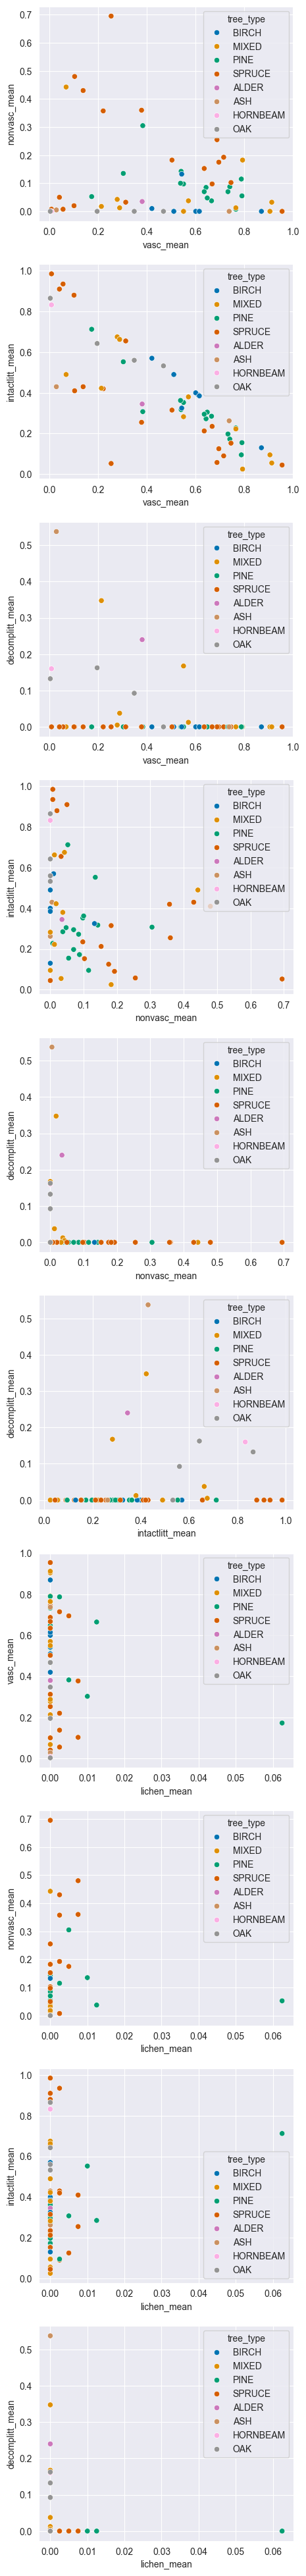

In [60]:
fig, axes = plt.subplots(10, figsize=(5, 50))
sns.scatterplot(fractional_cover, x="vasc_mean", y="nonvasc_mean", hue="tree_type", palette="colorblind", ax=axes[0])
sns.scatterplot(fractional_cover, x="vasc_mean", y="intactlitt_mean", hue="tree_type", palette="colorblind", ax=axes[1])
sns.scatterplot(fractional_cover, x="vasc_mean", y="decomplitt_mean", hue="tree_type", palette="colorblind", ax=axes[2])
sns.scatterplot(fractional_cover, x="nonvasc_mean", y="intactlitt_mean", hue="tree_type", palette="colorblind", ax=axes[3])
sns.scatterplot(fractional_cover, x="nonvasc_mean", y="decomplitt_mean", hue="tree_type", palette="colorblind", ax=axes[4])
sns.scatterplot(fractional_cover, x="intactlitt_mean", y="decomplitt_mean", hue="tree_type", palette="colorblind", ax=axes[5])
sns.scatterplot(fractional_cover, x="lichen_mean", y="vasc_mean", hue="tree_type", palette="colorblind", ax=axes[6])
sns.scatterplot(fractional_cover, x="lichen_mean", y="nonvasc_mean", hue="tree_type", palette="colorblind", ax=axes[7])
sns.scatterplot(fractional_cover, x="lichen_mean", y="intactlitt_mean", hue="tree_type", palette="colorblind", ax=axes[8])
sns.scatterplot(fractional_cover, x="lichen_mean", y="decomplitt_mean", hue="tree_type", palette="colorblind", ax=axes[9])
fig.savefig('plots/fractional_cover_plots.png', dpi=300)

[TO DELETE] The interesting takeaways from above are that the amount of lichens is negligible compared to the amount of other elements present, and that when lichens or non-vascular plants are present in a significant amount, decomposed litter is not, and viceversa.

Check how similar fractional cover and hyperspectral measurements with the same plot ID/tree type are by calculating the silhouette score. Cluster fractional cover and hyperspectral measurements using KMeans and check to what extent do clusters correspond to a real plot or tree type. The hyperspectral features used are the ones obtained after performing dimensionality reduction.

In [61]:
cluster_values = fractional_cover_long[["decomplitt", "intactlitt", "lichen", "vasc", "nonvasc"]].to_numpy()
cluster_labels = fractional_cover_long["plot_ID"].to_numpy()
print(f"Silhouette score for fractional cover measurements clustered by plot ID: {silhouette_score(cluster_values, cluster_labels)}")
kmeans_features = KMeans(n_clusters=58).fit(cluster_values)
print(f"Normalized mutual information score for KMeans clustering of fractional cover measurements considering plot ID as set of true labels: {normalized_mutual_info_score(cluster_labels, kmeans_features.labels_)}")

cluster_labels = fractional_cover_long["tree_type"].to_numpy()
print(f"Silhouette score for fractional cover measurements clustered by tree type: {silhouette_score(cluster_values, cluster_labels)}")
kmeans_features = KMeans(n_clusters=8).fit(cluster_values)
print(f"Normalized mutual information score for KMeans clustering of fractional cover measurements considering tree type as set of true labels: {normalized_mutual_info_score(cluster_labels, kmeans_features.labels_)}")

cluster_labels = fractional_cover["plot_ID"].to_numpy().repeat(15)
cluster_labels = np.delete(cluster_labels, np.where(cluster_labels == "HY_PINE5")[0][0])
print(f"Silhouette score for hyperspectral features clustered by plot ID: {silhouette_score(pca_features, cluster_labels)}")
kmeans_features = KMeans(n_clusters=58).fit(pca_features)
print(f"Normalized mutual information score for KMeans clustering of hyperspectral features considering plot ID as set of true labels: {normalized_mutual_info_score(cluster_labels, kmeans_features.labels_)}")

cluster_labels = fractional_cover["tree_type"].to_numpy().repeat(15)
cluster_labels = np.delete(cluster_labels, np.where(cluster_labels == "PINE")[0][0])
print(f"Silhouette score for hyperspectral features clustered by tree type: {silhouette_score(pca_features, cluster_labels)}")
kmeans_features = KMeans(n_clusters=8).fit(pca_features)
print(f"Normalized mutual information score for KMeans clustering of hyperspectral features considering tree type as set of true labels: {normalized_mutual_info_score(cluster_labels, kmeans_features.labels_)}")

Silhouette score for fractional cover measurements clustered by plot ID: -0.3688562443513332
Normalized mutual information score for KMeans clustering of fractional cover measurements considering plot ID as set of true labels: 0.6699689833341745
Silhouette score for fractional cover measurements clustered by tree type: -0.22019296708837638
Normalized mutual information score for KMeans clustering of fractional cover measurements considering tree type as set of true labels: 0.18905102355873118
Silhouette score for hyperspectral features clustered by plot ID: -0.18194610021021626
Normalized mutual information score for KMeans clustering of hyperspectral features considering plot ID as set of true labels: 0.5266770143758017
Silhouette score for hyperspectral features clustered by tree type: -0.15484042149096444
Normalized mutual information score for KMeans clustering of hyperspectral features considering tree type as set of true labels: 0.10492629076721269
